In [27]:
import random


In [30]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [21]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''

In [25]:
def generate(grammar_rules, target):
    if target in grammar_rules:
        candidates = grammar_rules[target]
        candidate = random.choice(candidates)
        return ''.join(generate(grammar_rules, target=c.strip()) for c in candidate.split())
    else:
        return target
    
def get_generation_by_gram(grammar_str:str, target, stmt_split='=', or_split='|'):
    '''grammar_str:语法树
       target：
       stmt_split：分隔符
       or_split：分隔符 
    '''
    rules = dict()
    for line in grammar_str.split('\n'):
        if not line:
            continue
        stmt, expr = line.split(stmt_split)
        rules[stmt.strip()] = expr.split(or_split)
        
    generated = generate(rules, target=target)
    
    return generated
            
# rules = get_generation_by_gram(hello_rules, 'say_hello', stmt_split='=', or_split='|')      
# generate(rules, 'say_hello')   
get_generation_by_gram(hello_rules, 'say_hello', stmt_split='=', or_split='|')  

'Jhon老梁老梁你好！'

In [31]:
get_generation_by_gram(simple_grammar, 'sentence', stmt_split='=>', or_split='|')  

'一个好看的蓝色的女人坐在这个蓝色的好看的好看的小猫'

In [45]:
simple_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''
for i in range(20):
    print(get_generation_by_gram(simple_programming, 'if_stmt', stmt_split='=>', or_split='|')  )

if(a3>=a){b0d=c}
if(2>=1){if(c<dd){00=3}}
if(2d==dd){if(a0>=3){1=1}}
if(130cd){if(dab){a0=22}}
if(c3c12<3){1dca2d3=bc}
if(20<=1b){22=2}
if(2<0cbc){1d2301a=1a}
if(b<c){if(cb1d2){cb0=1}}
if(3<=a0){22aa=c}
if(c<30b){if(3>=bac){b=ad}}
if(2b2a0){3=bb}
if(a<=1c){if(b3>=20){0012=b2ca023}}
if(c1c1>=2){if(11==c){if(3da<=2){if(3==d1d){a=3}}}}
if(0a){2c=a}
if(c<0a){a=03}
if(ddddc0){3=a2}
if(210<=331cc){1=b}
if(2>=2bd){if(c<=1030bb){if(dcc){if(a<=13){if(203==c){a1a=130}}}}}
if(d==1ca){b=d}
if(bdbbdd2dd){if(d>=c3b){if(cd0==21){if(22){a=dd}}}}


In [47]:
def name():
    return random.choice('Jhon | Mike | 老梁'.split('|'))
for i in range(10):
    print(name())

Jhon 
 Mike 
 老梁
Jhon 
Jhon 
 Mike 
Jhon 
 老梁
Jhon 
Jhon 


In [48]:
def hello():
    return random.choice('你好 | 您来啦 | 快请进'.split('|'))
for i in range(10):
    print(hello())

 快请进
 您来啦 
你好 
你好 
 快请进
 您来啦 
 快请进
 快请进
你好 
 快请进


In [49]:
def say_hello():
    return name()+ ' ' + hello()
for i in range(5):
    print(say_hello())

 老梁 你好 
 老梁 你好 
Jhon   您来啦 
 Mike   您来啦 
 Mike   快请进


In [50]:
corpus = "./article_9k.txt"

In [61]:
%%time
contents = open(corpus,encoding='utf-8').read()
type(contents)

Wall time: 331 ms


In [62]:
len(contents)

33425826

In [63]:
contents[:10]

'此外自本周6月12日'

In [64]:
import jieba

In [65]:
max_length = 1000000 
sub_file = contents[:max_length]

In [68]:
%%time
# 用jieba 分词
TOKENS = jieba.lcut(contents)
type(TOKENS)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\acer9527\AppData\Local\Temp\jieba.cache
Loading model cost 1.609 seconds.
Prefix dict has been built succesfully.


Wall time: 2min 23s


In [69]:
type(TOKENS)

list

In [70]:
TOKENS[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [71]:
from collections import Counter
import matplotlib.pyplot as plt
% %matplotlib inline

UsageError: Line magic function `%` not found.


In [72]:
words_count = Counter(TOKENS)

In [73]:
words_count.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

In [74]:
words_with_freqences = [f for w,f in words_count.most_common()]

In [75]:
words_with_freqences[:10]

[703716,
 382020,
 263597,
 189330,
 166300,
 142462,
 134061,
 123106,
 121938,
 100909]

In [76]:
import numpy as np

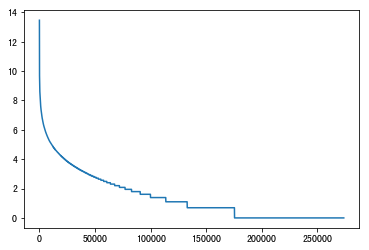

In [77]:
plt.plot(np.log(words_with_freqences))

In [78]:
jieba.lcut('一加手机5要做市面最轻薄')

['一加', '手机', '5', '要', '做', '市面', '最', '轻薄']

In [80]:
%%time
# 前一个和后一个拼接起来 形成2gram
_2_gram_words = [TOKENS[i] +TOKENS[i+1] for i in range(len(TOKENS)-1)]

Wall time: 5.37 s


In [81]:
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [82]:
_2_gram_words_count = Counter(_2_gram_words)

In [83]:
words_count.most_common()[-1]

('流年', 1)

In [84]:
def get_1_gram_count(word):
    '''获取1_gram的词频'''
    if word not in words_count:
        return words_count.most_common()[-1][-1]
    else:
        return words_count[word]
    
def get_2_gram_count(word):
    '''获取2_gram的词频'''
    if word not in _2_gram_words_count:
        return _2_gram_words_count.most_common()[-1][-1]
    else:
        return _2_gram_words_count[word]

In [86]:
def get_gram_count(word, wc):
    '''word:abs需要查询的词
        wc: word count
        融合了N_gram的方法 
    '''
    if word in wc:
        return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [87]:
get_gram_count('xxx', words_count)

2

In [88]:
get_gram_count('xxx', _2_gram_words_count)

1

In [93]:
def two_gram_model(sentence):
    ''' 获取二元词的概率
    sentence:
    '''
    # 切词
    token = jieba.lcut(sentence)
    
    probability = 1 
    
    for i in range(len(token)-1 ):
        word = token[i]
        
        next_word = token[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_words_count)
        
        _one_gram_c = get_gram_count(next_word, words_count)# 为什么是 next_word？？
        
        pro = _two_gram_c / _one_gram_c  # 不应该是 _2_gram_words_count 词典大小吗？？
        
        probability *= pro 
        
    return probability

In [94]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')  

4.741787766101897e-37

In [95]:
two_gram_model('前天早上吃晚饭的时候')

6.239387998125227e-10

In [96]:
two_gram_model('前天早上吃早饭的时候')

2.3509374521948863e-13

不科学呀？？ 是语料库太小吗？

In [97]:
two_gram_model('我请你吃火锅')

8.497849335963889e-07

In [98]:
two_gram_model('我请你吃日料大餐')

4.872460383977198e-10

In [99]:
two_gram_model('这个人来自清华大学')

1.364629466681511e-07

In [100]:
two_gram_model('这个人来自秦华大学')

4.607121764623602e-10

In [101]:
two_gram_model('这个花特别好看')

1.3702130336795815e-09

In [102]:
two_gram_model('花这特别好看')

6.397130259238779e-11

In [104]:
for sen in [get_generation_by_gram(simple_grammar,'sentence', stmt_split='=>', or_split='|') for _ in range(10)]:
    print('sentence: {} with prob: {}'.format(sen, two_gram_model(sen)))

sentence: 一个好看的小小的蓝色的小小的好看的蓝色的好看的桌子看着一个蓝色的蓝色的女人 with prob: 5.864781225119841e-56
sentence: 一个小小的小小的女人坐在这个蓝色的女人 with prob: 3.889873641611419e-20
sentence: 一个小小的篮球看着这个好看的小小的蓝色的好看的桌子 with prob: 2.1069122667728008e-33
sentence: 这个蓝色的桌子听着一个小小的女人 with prob: 2.8228058993693106e-19
sentence: 这个好看的女人坐在这个小小的篮球 with prob: 1.5131188435662271e-19
sentence: 一个蓝色的蓝色的蓝色的小小的小猫看见这个蓝色的小小的小小的篮球 with prob: 7.196777743646927e-42
sentence: 一个蓝色的篮球听着这个小小的女人 with prob: 7.42540882845475e-21
sentence: 一个蓝色的女人看着这个小小的蓝色的小猫 with prob: 1.5582269932121198e-21
sentence: 一个蓝色的桌子看见一个小小的小小的小小的好看的蓝色的好看的小小的小小的女人 with prob: 1.8349005693757115e-44
sentence: 一个小小的蓝色的小小的好看的小小的好看的小小的蓝色的篮球看着一个小小的蓝色的篮球 with prob: 6.427572003095734e-53


In [105]:
sentences_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in sentences_compared:
    s1, s2 = s.split()
    p1, p2 =  two_gram_model(sen),two_gram_model(sen)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 6.427572003095734e-53
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.427572003095734e-53
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 6.427572003095734e-53
---- 真是一只好看的小猫 with probility 6.427572003095734e-53
今晚火锅去吃我 is more possible
---- 今晚我去吃火锅 with probility 6.427572003095734e-53
---- 今晚火锅去吃我 with probility 6.427572003095734e-53
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 6.427572003095734e-53
---- 养乐多绿来一杯 with probility 6.427572003095734e-53


感觉结果和想象中的不一样呢？

# 定义你自己的语法

In [115]:
Self_gram = """
person_info = 姓名 程度副词* 擅长 特点
姓名 = 刘邦 | 韩信| 项羽
程度副词* =  程度副词|  程度副词*
程度副词 = 很 | 非常 | 特别 | 极其
擅长 = 喜欢 | 善于 | 擅长
特点 = 统兵打仗 | 统帅 | 打仗 | 屠杀功臣| 自以为是| 分封诸侯
"""
get_generation_by_gram(Self_gram, 'person_info', stmt_split='=', or_split='|')  

'项羽很善于统兵打仗'

In [111]:
def get_generation_n_by_gram(grammar, target, n):
    """根据语法树产生n条语句"""
    result = []
    for i in range(n):
        sentence = get_generation_by_gram(grammar, target=target, stmt_split='=', or_split='|') 
        result.append(sentence)
        
    return result
sentences_n = get_generation_n_by_gram(Self_gram, 'person_info', 5)

In [112]:
sentences_n

['项羽极其喜欢打仗', '韩信非常善于统兵打仗', '项羽特别喜欢自以为是', '刘邦特别善于统帅', '项羽很喜欢屠杀功臣']

# 获得最优质的的语言

In [116]:
def generate_best(grammar, target, n):
    '''该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子
    '''
    sentences = []
    for i in range(n):
        sentence = get_generation_by_gram(grammar, target=target, stmt_split='=', or_split='|') 
        sentences.append(sentence)
        
    result = [(sentence, two_gram_model(sen)) for sentence in sentences]
    
    sorted(result, key=lambda x: x[1], reverse=True)
    
    return result[0],result
best,all_result = generate_best(Self_gram, 'person_info', 5)
print("best:",best,'\n')
for item in all_result:
    print('-'*4 + ' {} with probility {}'.format(item[0], item[1]))

best: ('刘邦非常喜欢打仗', 6.427572003095734e-53) 

---- 刘邦非常喜欢打仗 with probility 6.427572003095734e-53
---- 刘邦极其喜欢统兵打仗 with probility 6.427572003095734e-53
---- 项羽非常喜欢打仗 with probility 6.427572003095734e-53
---- 项羽特别善于自以为是 with probility 6.427572003095734e-53
---- 韩信很喜欢统帅 with probility 6.427572003095734e-53


# 2. 使用新数据源完成语言模型的训练

In [117]:
import pandas as pd 

In [118]:
copurs_data = pd.read_csv("./movie_comments.csv")

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
copurs_data.shape

(261497, 5)

In [119]:
copurs_data.dtypes

id         object
link       object
name       object
comment    object
star       object
dtype: object

In [120]:
copurs_data.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [121]:
copurs_data.name.nunique()

2760

In [123]:
import re
def data_preprocessinng(content):
    '''去除文本中的非汉字字符'''
    return ''.join(re.findall('\w+',content))

In [127]:
%%time
# 文本清洗 去除非汉字字符
copurs_data['comment'] = copurs_data['comment'].apply(lambda x: data_preprocessinng(str(x)))

Wall time: 722 ms


In [128]:
copurs_data.head()

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说好看到不像战狼1的续集完虐湄公河行动,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [129]:
%%time
# 提取所有comments
all_comment = ''.join(copurs_data.comment.tolist())

Wall time: 41.9 ms


In [130]:
%%time
# 切词
all_token_list = jieba.lcut(all_comment)

Wall time: 56.1 s


In [131]:
# 生成2gram语料
_2_gram_words_new = [all_token_list[i] +all_token_list[i+1] for i in range(len(all_token_list)-1)]
_2_gram_words_count = Counter(_2_gram_words_new)

In [132]:
_1_gram_words_count = Counter(all_token_list)

In [133]:
def prob_1(word,words_freq_counter):
    '''1gram'''
    return _1_gram_words_count[word] / sum(words_freq_counter.values()) if word in _1_gram_words_count else 1/sum(words_freq_counter.values())

In [134]:
prob_1('我们',_1_gram_words_count)

0.001309328166445808

In [135]:
all_token_list[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [136]:
prob_1('吹牛',_1_gram_words_count)

6.685931062701999e-06

In [138]:
# 改进2gram函数：使得它对所有新的2gram语料库兼容 General purpose
def two_gram_model_general(sentence,_1_gram_words_count,  _2_gram_words_count):
    ''' 获取二元词的概率
    sentence:
    '''
    # 切词
    token = jieba.lcut(sentence)
    
    probability = 1 
    
    for i in range(len(token)-1 ):
        word = token[i]
        
        next_word = token[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_words_count)
        
        _one_gram_c = get_gram_count(next_word, _1_gram_words_count)# 为什么是 next_word？？
        
        pro = _two_gram_c / _one_gram_c  # 不应该是 _2_gram_words_count 词典大小吗？？
        
        probability *= pro 
        
    return probability

def generate_best_general(grammar, target, n):
    '''该函数输入一个语法 + 语言模型，能够生成n个句子，并能选择一个最合理的句子
    '''
    sentences = []
    for i in range(n):
        sentence = get_generation_by_gram(grammar, target=target, stmt_split='=', or_split='|') 
        sentences.append(sentence)
        
    result = [(sentence, two_gram_model_general(sen,_1_gram_words_count ,_2_gram_words_count)) for sentence in sentences]
    
    sorted(result, key=lambda x: x[1], reverse=True)
    
    return result[0],result

best,all_result = generate_best_general(Self_gram, 'person_info', 5)
print("best:",best,'\n')
for item in all_result:
    print('-'*4 + ' {} with probility {}'.format(item[0], item[1]))

best: ('韩信很喜欢统兵打仗', 3.8711555103316493e-47) 

---- 韩信很喜欢统兵打仗 with probility 3.8711555103316493e-47
---- 刘邦极其善于统帅 with probility 3.8711555103316493e-47
---- 项羽极其善于统兵打仗 with probility 3.8711555103316493e-47
---- 刘邦很喜欢分封诸侯 with probility 3.8711555103316493e-47
---- 刘邦非常喜欢屠杀功臣 with probility 3.8711555103316493e-47


In [139]:
new_gram = """
person_info = 姓名 程度副词* 擅长 特点
姓名 =高晓松 | 岳云鹏| 于谦
程度副词* = null | 程度副词 程度副词*
程度副词 = 很 | 非常 | 特别 | 极其
擅长 = 喜欢 | 善于 | 擅长
特点 = 作词 | 作曲 | 喝酒 | 损人| 说相声| 拍电影
"""
best,all_result = generate_best_general(new_gram, 'person_info', 5)
print("best:",best,'\n')
for item in all_result:
    print('-'*4 + ' {} with probility {}'.format(item[0], item[1]))

best: ('高晓松null喜欢损人', 3.8711555103316493e-47) 

---- 高晓松null喜欢损人 with probility 3.8711555103316493e-47
---- 于谦null喜欢拍电影 with probility 3.8711555103316493e-47
---- 于谦很很null喜欢作词 with probility 3.8711555103316493e-47
---- 高晓松null善于作词 with probility 3.8711555103316493e-47
---- 高晓松极其非常null喜欢说相声 with probility 3.8711555103316493e-47


In [140]:
need_compared = [
    "法律要求残疾保险吗 宪法要求残疾宝险吗",
    "我可以开一辆没有保险的新车吗 一辆没有保险的新车可以开上路吗",
    "什么时候要注册医疗保险 什么时候要注册医疗抱险",
    "为什么要为汽车保险付钱 为什么要为汽车保险复钱"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = two_gram_model_general(s1,_1_gram_words_count,  _2_gram_words_count),two_gram_model_general(s2,_1_gram_words_count,  _2_gram_words_count)

    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

宪法要求残疾宝险吗 is more possible
---- 法律要求残疾保险吗 with probility 8.942967370295762e-10
---- 宪法要求残疾宝险吗 with probility 2.325171516276898e-08
我可以开一辆没有保险的新车吗 is more possible
---- 我可以开一辆没有保险的新车吗 with probility 6.116516203026569e-20
---- 一辆没有保险的新车可以开上路吗 with probility 6.379097665053176e-22
什么时候要注册医疗保险 is more possible
---- 什么时候要注册医疗保险 with probility 9.613614912671232e-06
---- 什么时候要注册医疗抱险 with probility 3.3150396250590456e-07
为什么要为汽车保险复钱 is more possible
---- 为什么要为汽车保险付钱 with probility 5.93737898352752e-05
---- 为什么要为汽车保险复钱 with probility 0.000296868949176376


generate_best(self_definition_grammer, tokens_2gram_counter, 'self_info', 5) 

Q: 这个模型有什么问题？ 你准备如何提升？

Ans: 1.语言模型用到的预料和生成句子不是一个领域的，所以结果有偏差.

# (Optional) 完成基于Pattern Match的语句问答